#### Import the libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from train_evaluate_AutoencoderCNN import plot_reconstructions, generate_reconstruction_dict
from Autoencoder import Autoencoder

In [2]:
%matplotlib inline

#### Set proper device based on cuda availability 

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

#### Implement an autoencoder using fully connected layers

In [4]:
%run -i train_evaluate_AutoencoderCNN.py --mode=fc --learning_rate=1.0 --num_epochs=10 --batch-size=10 --log_dir=logs

Torch device selected:  cpu
fc
Network in fc
Total parameters is =  468368
Encoder parameters is =  233856.0
Decoder parameters is =  234512.0
Train set: Average loss: 0.5983


Test set: Average loss: 0.5485

Model Saved
Train set: Average loss: 0.5288


Test set: Average loss: 0.5226

Model Saved
Train set: Average loss: 0.5120


Test set: Average loss: 0.5140

Model Saved
Train set: Average loss: 0.5049


Test set: Average loss: 0.5079

Model Saved
Train set: Average loss: 0.5007


Test set: Average loss: 0.5057

Model Saved
Train set: Average loss: 0.4980


Test set: Average loss: 0.5021

Model Saved
Train set: Average loss: 0.4962


Test set: Average loss: 0.5006

Model Saved
Train set: Average loss: 0.4948


Test set: Average loss: 0.4996

Model Saved
Train set: Average loss: 0.4934


Test set: Average loss: 0.4996

Model Saved
Train set: Average loss: 0.4925


Test set: Average loss: 0.4988

Model Saved
Training and evaluation finished


#### Load best weights

In [5]:
file = torch.load('./best_weights/fc_best.pth')
print('Average Loss ',file['best_loss'])

Average Loss  0.4988160799741745


#### Initialize the model 

In [6]:
model_fc = Autoencoder(FLAGS.mode).to(device)

fc


#### Load the trained model

In [7]:
model_fc.load_state_dict(file['state_dict'])

<All keys matched successfully>

#### Reconstructs the new test loader with batch_size = 1 from testing data and collects Test data (2 image for each class)

In [8]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset2 = datasets.MNIST('./data/', train=False, transform=transform)  
reconstruction_test_loader = DataLoader(dataset2, batch_size = 1, shuffle=True, num_workers=1)

In [9]:
datadict = generate_reconstruction_dict(reconstruction_test_loader)

#### Define loss function

In [10]:
criterion = nn.MSELoss()

#### Reconstruction loss calculated using the criterion and Plotting it in 10x4 subplots with the original ones

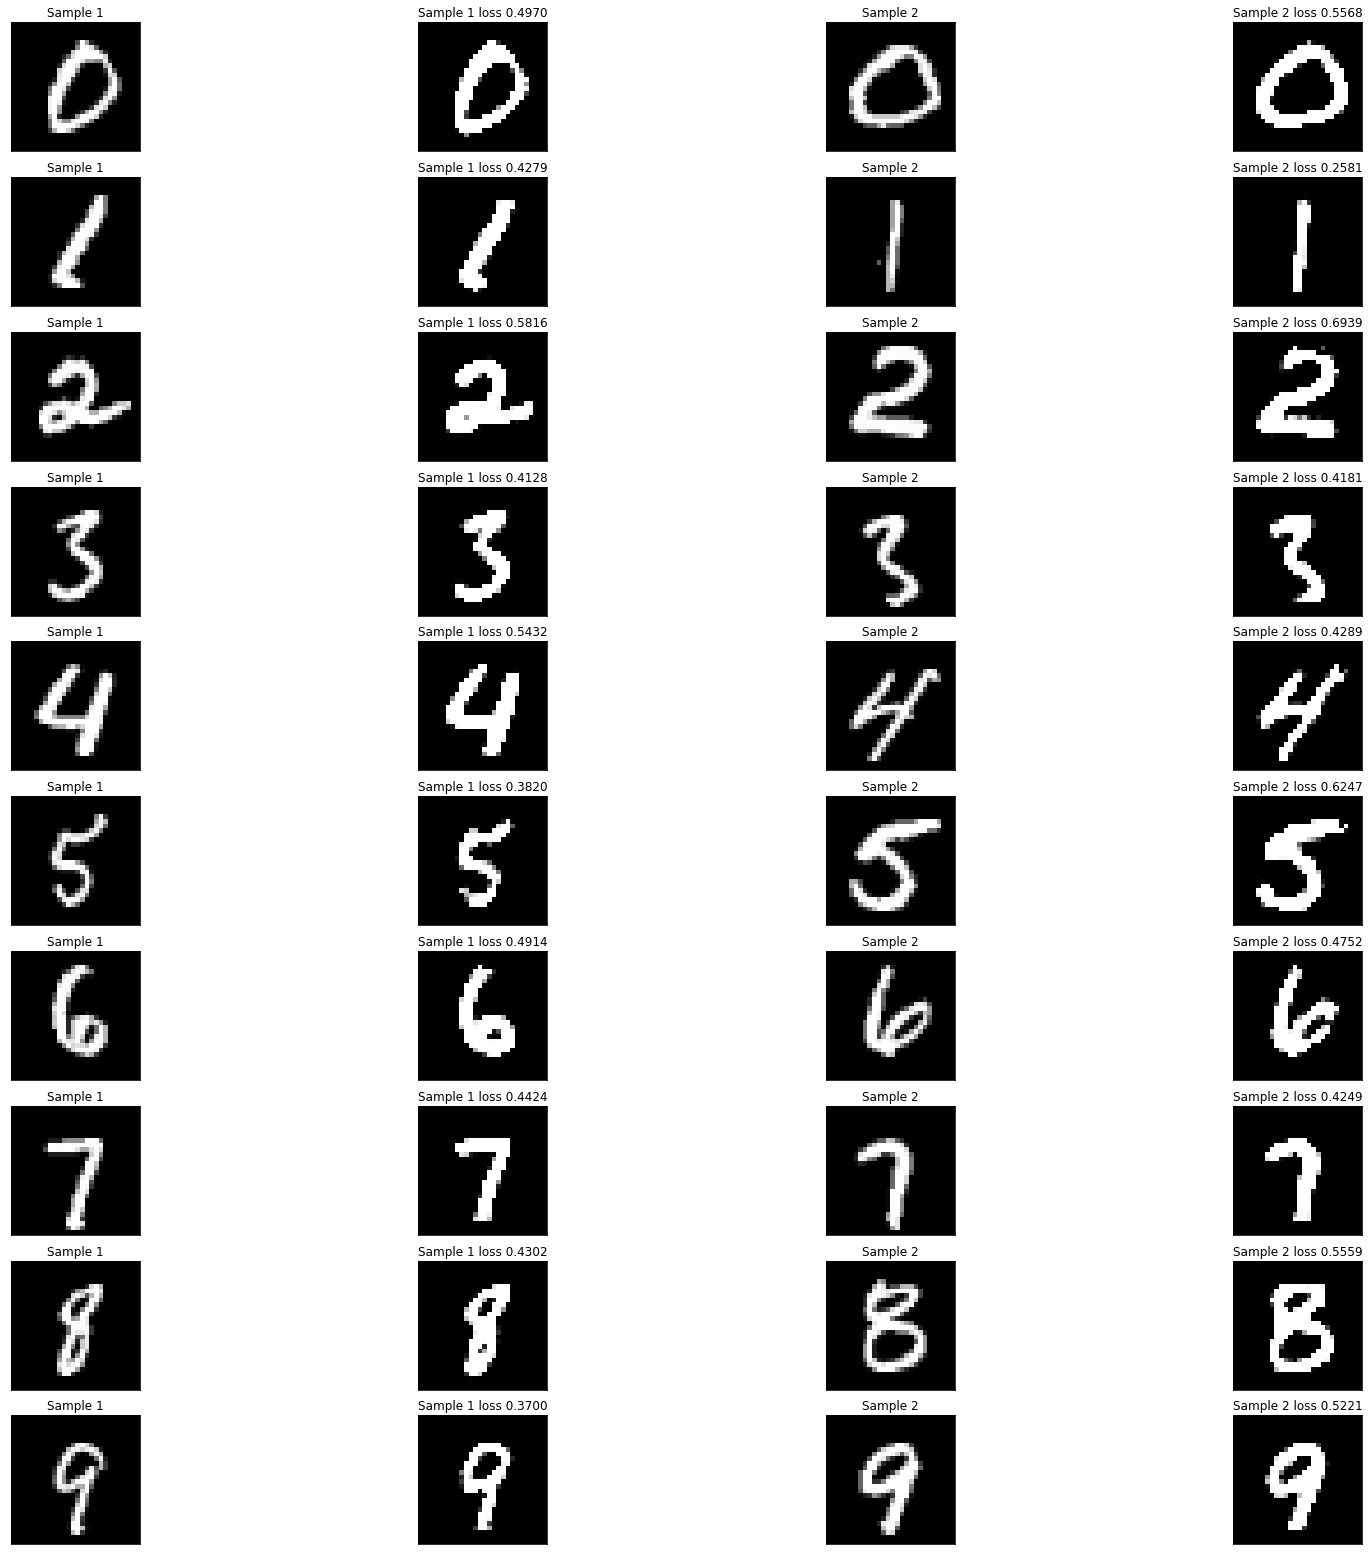

In [11]:
loss_fc, total_loss_fc = plot_reconstructions(model_fc, device, criterion, datadict=datadict)